In [66]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [67]:
# Import csv to be plotted
df_plots = pd.read_csv('../data/cleaned_data/us_accidents_cleaned.csv')

In [68]:
# Check preview of data
df_plots.head()

,severity,start_lat,start_lng,description,city,county,state,temperature(f),humidity(%),visibility(mi),...,precipitation(in),weather_condition,crossing,junction,traffic_signal,sunrise_sunset,year,month,day,time
0,2,37.530804,-122.297714,Accident on 39th Ave at Edison St.,San Mateo,San Mateo,CA,69.8,56.0,9.0,...,0.0,Clear,False,False,False,Day,2016,July,1,13:17:37
1,2,27.960699,-82.705109,Accident on Bayshore Blvd at FL-60 Gulf To Bay...,Clearwater,Pinellas,FL,84.0,82.0,9.0,...,0.0,Fair,True,False,True,Day,2019,June,26,08:17:21
2,2,37.701230,-121.834055,Stationary traffic on I-580 W from Airway Blvd...,Livermore,Alameda,CA,68.0,39.0,10.0,...,0.0,Fair,False,False,False,Day,2022,February,19,13:59:30
3,2,42.385570,-83.261400,At I-96 Local/Outer Dr/Exit 180 - Accident.,Detroit,Wayne,MI,67.5,85.0,10.0,...,0.0,Clear,False,True,False,Day,2018,August,20,07:36:17
4,2,38.347090,-112.659636,At I-15-BL/1400 St/Exit 112 - Accident.,Beaver,Beaver,UT,26.6,80.0,10.0,...,0.0,Mostly Cloudy,False,False,False,Day,2019,February,17,09:48:00


### Plotting number of crashes by hour
To be able to do this we need to extract the hours out of the time column. Before we can do that we need to convert it from int to datetime. 

In [69]:
# 1. Convert the 'time' column to datetime format
df_plots['time'] = pd.to_datetime(df_plots['time'])

C:\Users\Steven\AppData\Local\Temp\ipykernel_25328\194355731.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [70]:
# Extract the hour (HH) from data
df_plots['hour'] = df_plots['time'].dt.hour

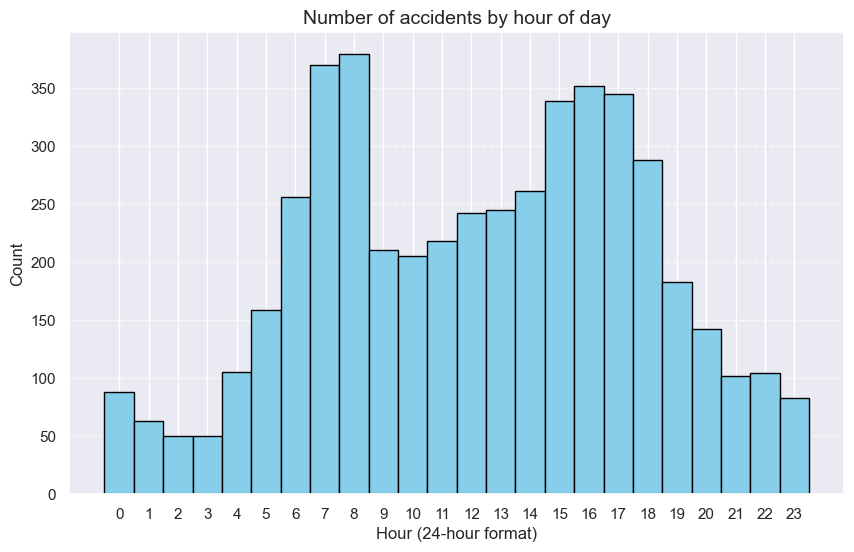

In [71]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_plots['hour'], bins=range(25), color='skyblue', edgecolor='black', align='left')


plt.title('Number of accidents by hour of day', fontsize=14)
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

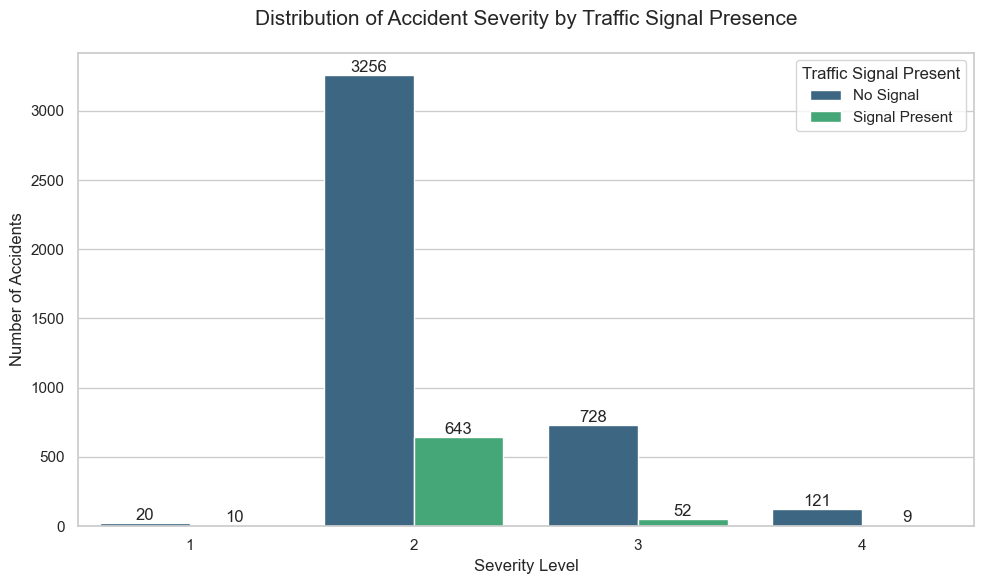

In [72]:
# Plot bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=df_plots, 
    x='severity', 
    hue='traffic_signal', 
    palette='viridis'
    )
plt.title('Distribution of Accident Severity by Traffic Signal Presence', fontsize=15, pad=20)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Traffic Signal Present', labels=['No Signal', 'Signal Present'])
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

In [73]:
# Define the correct chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

df_plots['month'] = pd.Categorical(df_plots['month'], categories=month_order, ordered=True)

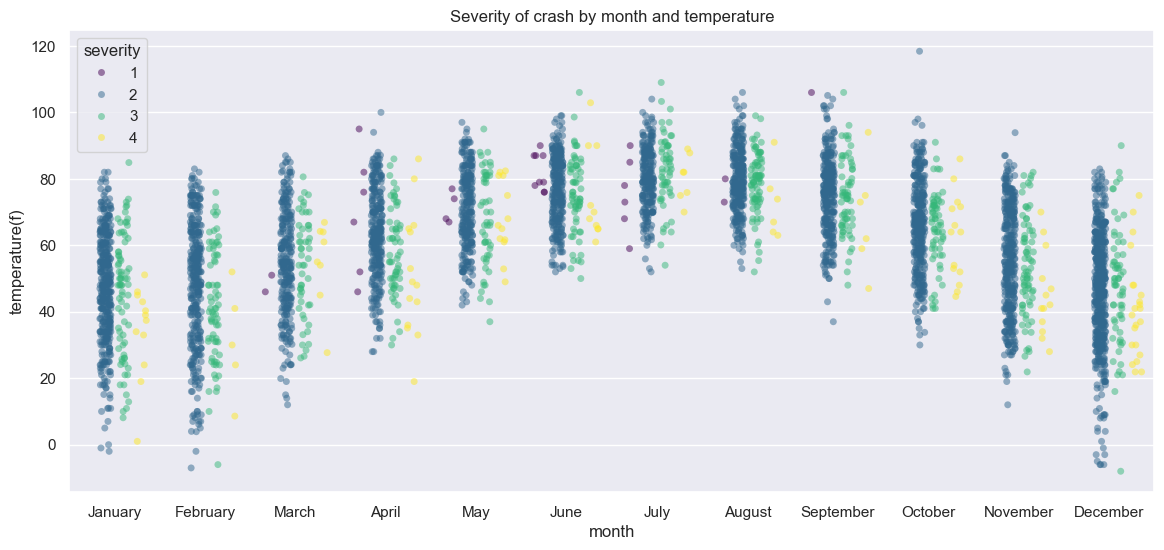

In [74]:
# Plot strip plot
plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.stripplot(
    data=df_plots, 
    x='month', 
    y='temperature(f)', 
    hue='severity', 
    palette='viridis', 
    dodge=True, 
    jitter=0.25,
    alpha=0.5
)

plt.title("Severity of crash by month and temperature")
plt.show()

In [75]:
df_plots.columns

Index(['severity', 'start_lat', 'start_lng', 'description', 'city', 'county',
       'state', 'temperature(f)', 'humidity(%)', 'visibility(mi)',
       'wind_direction', 'wind_speed(mph)', 'precipitation(in)',
       'weather_condition', 'crossing', 'junction', 'traffic_signal',
       'sunrise_sunset', 'year', 'month', 'day', 'time', 'hour'],
      dtype='object')

We looked into plotting the data by weather but there are far too many values to do that. We will look to map it down to a more manageable number of categories.

In [76]:
# Check number of values in weather condition field
df_plots['weather_condition'].nunique()

44

In [77]:
# Check value counts for each condition
df_plots['weather_condition'].value_counts()

weather_condition
Fair                            1634
Mostly Cloudy                    702
Cloudy                           527
Clear                            518
Partly Cloudy                    452
Overcast                         235
Light Rain                       208
Scattered Clouds                 119
Light Snow                        87
Fog                               59
Rain                              54
Haze                              49
Fair / Windy                      30
Cloudy / Windy                    16
Heavy Rain                        13
Snow                              12
Mostly Cloudy / Windy             11
Thunder                           11
Thunder in the Vicinity           10
Light Drizzle                     10
T-Storm                           10
Heavy T-Storm                     10
Smoke                              9
Light Thunderstorms and Rain       5
Wintry Mix                         5
Light Rain with Thunder            5
Drizzle             

In [78]:
# 1. Define the categories
weather_map = {
    # Clear / Fair
    'Fair': 'Clear/Fair', 'Clear': 'Clear/Fair', 'Fair / Windy': 'Clear/Fair',
    
    # Cloudy
    'Mostly Cloudy': 'Cloudy', 'Cloudy': 'Cloudy', 'Partly Cloudy': 'Cloudy', 
    'Overcast': 'Cloudy', 'Scattered Clouds': 'Cloudy', 'Cloudy / Windy': 'Cloudy',
    'Mostly Cloudy / Windy': 'Cloudy', 'Partly Cloudy / Windy': 'Cloudy',
    
    # Rain / Drizzle / Fog
    'Light Rain': 'Rain/Fog', 'Rain': 'Rain/Fog', 'Heavy Rain': 'Rain/Fog', 
    'Drizzle': 'Rain/Fog', 'Light Drizzle': 'Rain/Fog', 'Heavy Drizzle': 'Rain/Fog', 
    'Light Rain / Windy': 'Rain/Fog', 'Mist': 'Rain/Fog', 'Fog': 'Rain/Fog', 
    'Haze': 'Rain/Fog', 'Shallow Fog': 'Rain/Fog', 'Light Freezing Fog': 'Rain/Fog',
    
    # Snow / Ice
    'Light Snow': 'Snow/Ice', 'Snow': 'Snow/Ice', 'Heavy Snow': 'Snow/Ice',
    'Wintry Mix': 'Snow/Ice', 'Light Freezing Rain': 'Snow/Ice', 
    'Light Ice Pellets': 'Snow/Ice', 'Snow / Windy': 'Snow/Ice', 
    'Light Snow / Windy': 'Snow/Ice', 'Snow and Sleet / Windy': 'Snow/Ice',
    
    # Storms / Windy / Other
    'Thunder': 'Storm/Other', 'Thunder in the Vicinity': 'Storm/Other', 'T-Storm': 'Storm/Other',
    'Heavy T-Storm': 'Storm/Other', 'Light Thunderstorms and Rain': 'Storm/Other',
    'Light Rain with Thunder': 'Storm/Other', 'Thunderstorm': 'Storm/Other', 
    'Thunderstorms and Rain': 'Storm/Other', 'Thunder / Windy': 'Storm/Other',
    'Smoke': 'Storm/Other', 'Blowing Dust / Windy': 'Storm/Other'
}

# 2. Assign to the 'weather' column
df_plots['weather'] = df_plots['weather_condition'].map(weather_map)

# 3. Handle any N/A or unmapped values
df_plots['weather'] = df_plots['weather'].fillna('Other')

In [79]:
# Check new value counts
df_plots['weather'].value_counts()

weather
Clear/Fair     2182
Cloudy         2066
Rain/Fog        409
Snow/Ice        116
Storm/Other      64
Other             2
Name: count, dtype: int64

In [80]:
# Reassign weather to include all values except other
df_plots = df_plots[df_plots['weather'] != 'Other']

In [81]:
# Check new value counts.
df_plots['weather'].value_counts()

weather
Clear/Fair     2182
Cloudy         2066
Rain/Fog        409
Snow/Ice        116
Storm/Other      64
Name: count, dtype: int64

In [82]:
# Export new dataset to csv
df_plots.to_csv('../data/cleaned_data/us_accidents_cleaned_v3.0.csv', index=False)

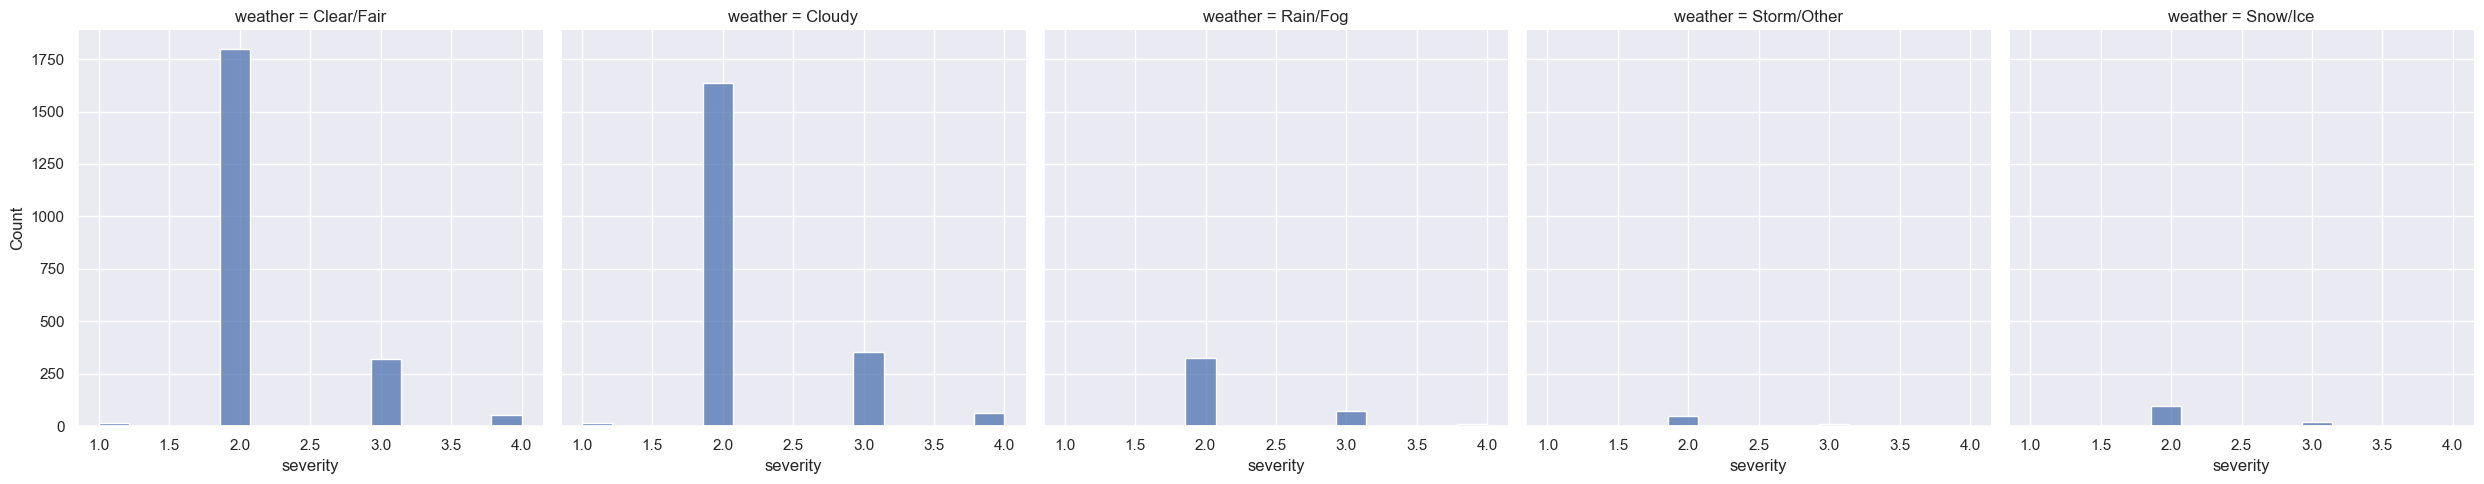

In [83]:
# Visualise the influence weather has on severity of crash
sns.displot(df_plots, x='severity', col="weather")
plt.show()

In [84]:
df_plots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4838
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   severity           4837 non-null   int64         
 1   start_lat          4837 non-null   float64       
 2   start_lng          4837 non-null   float64       
 3   description        4837 non-null   object        
 4   city               4837 non-null   object        
 5   county             4837 non-null   object        
 6   state              4837 non-null   object        
 7   temperature(f)     4837 non-null   float64       
 8   humidity(%)        4837 non-null   float64       
 9   visibility(mi)     4837 non-null   float64       
 10  wind_direction     4837 non-null   object        
 11  wind_speed(mph)    4837 non-null   float64       
 12  precipitation(in)  4837 non-null   float64       
 13  weather_condition  4837 non-null   object        
 14  crossing     

In [85]:
# Plot plotly visualisation
fig = px.sunburst(
    df_plots,
    path=['sunrise_sunset', 'weather'], 
    values='severity',
    color='severity',  
    color_continuous_scale='RdBu_r', 
    title="Accidents by time of day and weather conditions",
    branchvalues="total"
)

fig.update_layout(
    margin=dict(t=60, l=0, r=0, b=0),
    coloraxis_colorbar_title="Avg Severity"
)

fig.show()